K =  2


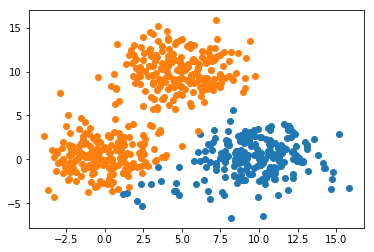

K-means objective function =  2869.770615641856


K =  3


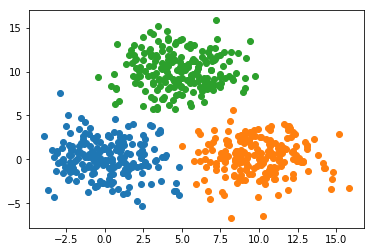

K-means objective function =  1561.1764770411203


K =  4


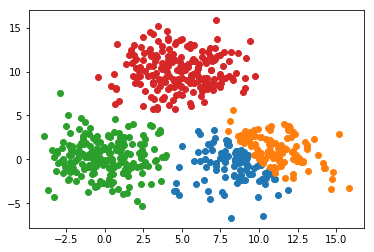

K-means objective function =  1454.16965626236


K =  5


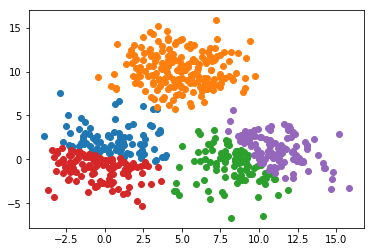

K-means objective function =  1358.6816940800445




In [6]:
#William Dahl
#ICSI 436
#HW3
#Febuary 22nd, 2019

import matplotlib.pyplot as plt
import random
import math

#choses the starting random points to be used ad the centers for the clusters
def getCenters(x,y,k):
    #C is a matrix of 2xk
    C = list(list())
    #choses k starting points
    for i in range(k):
        #choses random points to be selected
        randomNum = random.randint(0,len(x))
        #Adds the points to the list of centers
        C.append([x[randomNum],y[randomNum]])
        
    return C

#gets the clusters from the Center points
def getClusters(x,y,C):
    #Clusters is a dictoanrly with its key represting a cluster and its values being the points in the cluster
    Clusters = dict()
    #intalizes the values of the clusters to be list
    for j in range(len(C)):
        Clusters[j] = list()
    
    #loops through all of the points
    for i in range(len(x)):
        minDistance = -1
        #loops trhough all the center staring points
        for j in range(len(C)):
            #distance from point to one of the centers
            distance = math.sqrt(math.pow(x[i]-C[j][0],2) + math.pow(y[i]-C[j][1],2))
            #if the distance is less than the current distance calculated then that is 
            #set to the new ditance from the point
            #and the cluster is chosen based on the point in the Center matrix
            if distance < minDistance or minDistance is -1:
                minDistance = distance
                cluster = j
        
        #adds the point to its cluster
        Clusters[cluster].append([x[i],y[i]])
        
    return Clusters

#calculates the new centers of the clusters by averageing the sum of all points in the cluster
def getNewCenters(Clusters):
    #new cneter matrix
    C = list(list())
    #loops through clusters
    for cluster in Clusters:
        x_point = 0
        y_point = 0
        #loops through points
        for point in Clusters[cluster]:
            #summs the points
            x_point += point[0]
            y_point += point[1]
        
        #adds the average to the new center matrix
        C.append([x_point/len(Clusters[cluster]),y_point/len(Clusters[cluster])])
    
    return C

#graphs the clusters
def graph(Clusters):
    #loops throught the clusters
    for i in range(len(Clusters)):
        clustered_x = list()
        clustered_y = list()
        #loops throught the points
        for j in range(len(Clusters[i])):
            #puts the x and y cordinates into respective lists for graphing
            clustered_x.append(Clusters[i][j][0])
            clustered_y.append(Clusters[i][j][1])
    
        #graphs the points
        plt.plot(clustered_x,clustered_y, 'o')
        
    plt.show()

#Calulates the k-means objective function
def objective(Clusters, C):
    total = 0
    #sums the distance between the points and their clusters centers
    for cluster in Clusters:
        for point in Clusters[cluster]:
            total += math.sqrt(math.pow(point[0]-C[cluster][0],2) + math.pow(point[1]-C[cluster][1],2))
    
    return total
    
#executes the k-means algorithm    
def k_means(x,y,k):
    print('K = ',k)
    C = getCenters(x,y,k)
    Clusters = getClusters(x,y,C)
    new_C = getNewCenters(Clusters)
    
    #goes until the cluster centers are no longer changing
    while C != new_C:
        C = new_C
        Clusters = getClusters(x,y,C)
        new_C = getNewCenters(Clusters)
        
    graph(Clusters)
    print('K-means objective function = ', objective(Clusters,C))
    print('\n')

#reads the data in 'hw3.dat' in to the the respective x y cordinates lists
x = []
y = []
for line in open('hw3.dat'):
    data = line.split()
    x.append(float(data[0]))
    y.append(float(data[1]))

#preformes the k-means algorithm with a k value of 2,3,4,5 respectivly
k_means(x,y,2)
k_means(x,y,3)
k_means(x,y,4)
k_means(x,y,5)

In [ ]:
#The best value for K is 3 because that is the value that minimizes 
#the k-means objective function while also remaining
#consitant no matter the statring centers. When K is 4 or 5, the value 
#of the function is lower but it is not constant
#and changes based on the starting points chosen to be the centers.However, 
#When K is 3 the value stays constant
#and is lower than the value when K = 2